# <center>Human Pollution as a Public Health Risk<center>
#### <center>Elliot Varnai<center>

## Introduction

### The problem

It should be no surprise that pollution and climate change are real problems. Following tremendous advancements in technology and industry across the globe, people have begun to notice problems stemming from our own actions such as a [rising global temperature](https://www.climate.gov/news-features/understanding-climate/climate-change-global-temperature). This affects life in [every way imaginable](https://www.who.int/news-room/fact-sheets/detail/climate-change-and-health), from access to food, water, and shelter to storms, floods, and heatwaves. In addition to changing the global climate, our actions can have more direct impacts on human life. According to an article by [Forbes](https://www.forbes.com/sites/rrapier/2020/06/20/bp-review-new-highs-in-global-energy-consumption-and-carbon-emissions-in-2019/?sh=8957f6c66a16), fossil fuels accounted for 84% of the world's primary energy production. While fossil fuel plants are running, [they emit chemicals which are harmful to humans](https://www.nrdc.org/stories/fossil-fuels-dirty-facts#sec-burning), namely nitrogen dioxide.

According to the [EPA](https://www.epa.gov/no2-pollution/basic-information-about-no2), nitrogen dioxide is a gas that gets in the air primarily from vehicle emissions, power plants, and off-road equipment. NO2 forms [acid rain](https://www.epa.gov/acidrain/what-acid-rain), makes air hazy, and contributes to [nutrient pollution](https://oceanservice.noaa.gov/facts/nutpollution.html) in coastal waters. Inhaling high concentrations of NO2 in the short term can aggravate respiratory conditions such as asthma, cause coughing, wheezing, and difficulty breathing, and lead to visits to the hospital and emergency rooms. Long-term exposure can contribute to asthma and increase the risk of developing respiratory infections. On top of these direct health effects, NO2 and other nitrogen oxides form both ozone and particulate matter (PM) by reacting with other chemicals in the air.

According to the [United Nations Environment Programme](https://www.unep.org/news-and-stories/story/5-dangerous-pollutants-youre-breathing-every-day), ozone is a common greenhouse gas that forms when pollutants from things such as vehicles, industry, waste, and energy production interact in sunlight. Ground-level ozone causes an estimated 472,000 premature deaths every year, and on top of its [environmental effects](https://www.iowadnr.gov/Environmental-Protection/Air-Quality/Air-Pollutants/Effects-Ozone#:~:text=Ozone%20damages%20vegetation%20and%20ecosystems,process%20and%20release%20as%20oxygen.), ozone can trigger or worsen health conditions like bronchitis, emphysema, and asthma, and can cause chest pain, coughing, throat irritation, congestion, and lung damage.

The [EPA](https://www.epa.gov/pm-pollution/particulate-matter-pm-basics) defines PM2.5 as "fine inhalable particles, with diameters that are generally 2.5 micrometers and smaller," where PM stands for "particulate matter." Some of these particles come directly from sources such as construction sites and smokestacks, while most come from reactions in the atmosphere among pollutants from vehicles, industries, power plants, etc. PM has been linked to heart attacks, premature death, decreased lung function, and increased respiratory symptoms, to name a few things, and PM also has negative [environmental effects](https://www.epa.gov/pm-pollution/health-and-environmental-effects-particulate-matter-pm).

Power plants that use fossil fuels are directly harmful to the people around them.

### Purpose

The purpose of this tutorial project is to dig deeper into the health effects of human-caused air pollutants and to see how our decisions regarding energy production affect the air, and ultimately, our health. Data science is great for this as it allows us to look at real-world datasets on health and pollution and to break the data down and look for trends which would not otherwise be apparent.

## Step 1: Data curation, parsing, and management

To start things off, let's import the libraries we'll be using throughout the project.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

Next, let's download the data. First, go [here](https://www.kaggle.com/datasets/thedevastator/exploring-county-level-correlations-in-cancer-ra?resource=download) and click "Download" to download data on US cancer rates county-wide. You'll have to create an account on Kaggle but it's free to do so. This dataset comes from data made available by cancer.org and the US Census American Community Survey. 

For the next dataset, go [here](https://www.epa.gov/air-trends/air-quality-cities-and-counties) and click "Air Quality Statistics by County, 2021 (xlsx)" to download data on air quality across different counties in the US. This dataset comes from the United States Environmental Protections Agency (EPA)'s Air Quality System (AQS) database.

Next, go to [this link](https://www.cdc.gov/copd/data-and-statistics/county-estimates.html) and click "Download Data (CSV)" below the map for county-level estimates of Chronic Obstructive Pumlonary Disease (COPD) frequencies. This dataset was generated by the CDC based off of the CDC's BRFSS 2019 and ACS 2015-2019 and 2019 Census county population estimates.

Finally, head to [this link](https://www.kaggle.com/datasets/behroozsohrabi/us-electric-power-plants?resource=download) and click "Download." This dataset contains a vast array of information about every electric power plant in the US and is sourced from Homeland Infrastructure Foundation-Level Data.

Once you have the .zip files downloaded, extract them and move the extracted files to the same directory as your Jupyter Notebook file. Let's then use pandas to create a dataframe from the air quality dataset:

In [2]:
df = pd.read_excel('ctyfactbook2021.xlsx')
df

,"Air Quality Statistics by County, 2021",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Note: The values shown are the highest among t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,State,County,County FIPS Code,2010 Population,CO 8-hr (ppm),Pb 3-mo (µg/m3),NO2 AM (ppb),NO2 1-hr (ppb),O3 8-hr (ppm),PM10 24-hr (µg/m3),PM2.5 Wtd AM (µg/m3),PM2.5 24-hr (µg/m3),SO2 1-hr (ppb)
2,Alabama,Baldwin County,01003,182265,ND,ND,ND,ND,0.056,ND,7.3,15,ND
3,Alabama,Clay County,01027,13932,ND,ND,ND,ND,ND,ND,6.8,16,ND
4,Alabama,Colbert County,01033,54428,ND,ND,ND,ND,ND,ND,IN,IN,ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,ND - No Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1152,IN - Insufficient data to calculate summary ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1153,µg/m3 - micrograms per cubic meter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1154,ppm - parts per million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As you may notice right off the bat, there are some problems with the dataframe that pandas created for us. The column names are, for the most part, completely meaningless, and the first row is a bunch of NaN's. This is because the column headers should actually be the dataframe's first row ('State', 'County', etc.) and the data should begin immediately below it. For this, we need to reassign the dataframe's column names and remove the first two rows.

In [3]:
# Reset column names
df.columns = df.iloc[1]

# Drop first two (useless) rows
df = df[2:]

# Make it so the first row has index 0, second row has index 1, etc.
df.reset_index(inplace=True, drop=True)

Another problem is that there are some junk rows at the end of the dataframe which would cause problems later. Let's drop those 15 rows:

In [4]:
df = df[:-15]
df

1,State,County,County FIPS Code,2010 Population,CO 8-hr (ppm),Pb 3-mo (µg/m3),NO2 AM (ppb),NO2 1-hr (ppb),O3 8-hr (ppm),PM10 24-hr (µg/m3),PM2.5 Wtd AM (µg/m3),PM2.5 24-hr (µg/m3),SO2 1-hr (ppb)
0,Alabama,Baldwin County,01003,182265,ND,ND,ND,ND,0.056,ND,7.3,15,ND
1,Alabama,Clay County,01027,13932,ND,ND,ND,ND,ND,ND,6.8,16,ND
2,Alabama,Colbert County,01033,54428,ND,ND,ND,ND,ND,ND,IN,IN,ND
3,Alabama,DeKalb County,01049,71109,ND,ND,ND,ND,0.058,ND,7.7,18,ND
4,Alabama,Elmore County,01051,79303,ND,ND,ND,ND,0.054,ND,ND,ND,ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,Puerto Rico,"Humacao Municipio, Puerto Rico",72069,58466,ND,ND,ND,ND,ND,ND,IN,IN,ND
1135,Puerto Rico,"Lares Municipio, Puerto Rico",72081,30753,ND,ND,ND,ND,ND,ND,IN,IN,ND
1136,Puerto Rico,"Mayagüez Municipio, Puerto Rico",72097,89080,ND,ND,ND,ND,0.042,ND,IN,IN,ND
1137,Puerto Rico,"Ponce Municipio, Puerto Rico",72113,166327,30,ND,ND,ND,ND,100,IN,IN,ND


Already, our dataframe looks much better!

As our measure of air pollution, I've decided to use the "NO2 AM (ppb)," "O3 8-hr (ppm)," and "PM2.5 Wtd AM (µg/m3)" columns. "NO2 AM (ppb)" refers to the arithmetic mean concentration of nitrogen dioxide (in parts per billion), "O3 8-hr (ppm)" refers to the fourth daily maximum 8-hour concentration of ozone (in parts per million), and "PM2.5 Wtd AM (µg/m3)" refers to the weighted annual mean concentration of PM2.5 (in micrograms per cubic meter).

Since these two columns have oddly-placed tabs and spaces in their names, let's rename these two columns. Then, let's discard all the columns which are not relevant to us. Finally, let's replace all "No Data" and "Insufficient Data" entries with NaN and set the data type of 'County FIPS Code' to int since the FIPS codes aren't already stored as integers.

In [5]:
# This shows the column names, highlighting the fact that there are oddly placed spaces
df.columns

Index(['State', 'County', 'County FIPS Code', '2010 Population',
       'CO          8-hr (ppm)', 'Pb           3-mo (µg/m3)',
       'NO2         AM (ppb)', 'NO2          1-hr (ppb)',
       'O3            8-hr (ppm)', 'PM10        24-hr (µg/m3) ',
       'PM2.5     Wtd AM (µg/m3) ', 'PM2.5     24-hr (µg/m3) ',
       'SO2         1-hr (ppb)'],
      dtype='object', name=1)

In [6]:
# Rename the column names to get rid of spaces
df.rename(columns={"O3            8-hr (ppm)": "O3 8-hr (ppm)",
                   "PM2.5     Wtd AM (µg/m3) ": "PM2.5 Wtd AM (µg/m3)",
                   "NO2         AM (ppb)": "NO2 AM (ppb)"},
          inplace=True)

# Keep only the columns that are relevant to us
df = df[['State', 'County', 'County FIPS Code', 'NO2 AM (ppb)', 'O3 8-hr (ppm)', 'PM2.5 Wtd AM (µg/m3)']]

df = df.replace(['ND', 'IN'], np.nan)

df = df.astype({'County FIPS Code': int})

df

1,State,County,County FIPS Code,NO2 AM (ppb),O3 8-hr (ppm),PM2.5 Wtd AM (µg/m3)
0,Alabama,Baldwin County,1003,NaN,0.056,7.3
1,Alabama,Clay County,1027,NaN,NaN,6.8
2,Alabama,Colbert County,1033,NaN,NaN,NaN
3,Alabama,DeKalb County,1049,NaN,0.058,7.7
4,Alabama,Elmore County,1051,NaN,0.054,NaN
...,...,...,...,...,...,...
1134,Puerto Rico,"Humacao Municipio, Puerto Rico",72069,NaN,NaN,NaN
1135,Puerto Rico,"Lares Municipio, Puerto Rico",72081,NaN,NaN,NaN
1136,Puerto Rico,"Mayagüez Municipio, Puerto Rico",72097,NaN,0.042,NaN
1137,Puerto Rico,"Ponce Municipio, Puerto Rico",72113,NaN,NaN,NaN


This is all we need for pollution! Now, let's bring in the data on cancer incidence by county.

In [7]:
df2 = pd.read_csv('incd.csv')
df2

,index,County,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,0,"US (SEER+NPCR)(1,10)",0,62.4,62.3,62.6,214614,falling,-2.5,-3,-2
1,1,"Autauga County, Alabama(6,10)",1001,74.9,65.1,85.7,43,stable,0.5,-14.9,18.6
2,2,"Baldwin County, Alabama(6,10)",1003,66.9,62.4,71.7,170,stable,3,-10.2,18.3
3,3,"Barbour County, Alabama(6,10)",1005,74.6,61.8,89.4,25,stable,-6.4,-18.3,7.3
4,4,"Bibb County, Alabama(6,10)",1007,86.4,71,104.2,23,stable,-4.5,-31.4,32.9
...,...,...,...,...,...,...,...,...,...,...,...
3136,3136,"Sweetwater County, Wyoming(6,10)",56037,39.9,30.5,51.1,14,stable,12.6,-18.1,54.9
3137,3137,"Teton County, Wyoming(6,10)",56039,23.7,14.7,36.1,5,stable,-19.6,-35.5,0.1
3138,3138,"Uinta County, Wyoming(6,10)",56041,31.7,20.8,46.1,6,stable,-0.1,-18.3,22
3139,3139,"Washakie County, Wyoming(6,10)",56043,50,33.8,72.2,6,stable,13.5,-12.2,46.7


For this dataset, the only columns we need are FIPS (the [county code](https://en.wikipedia.org/wiki/FIPS_county_code) for each area) and age-adjusted incidence rate - cases per 100,000. [Age-adjustment](https://www.health.ny.gov/diseases/chronic/ageadj.htm) is important to make fair comparisons between population groups since diseases and health outcomes almost always occur at different rates at different ages.

Let's rename the incidence rate column to something prettier and then drop all irrelevant columns. We should also remove the first row since that's the US as a whole and not an individual county.

There's also some cleaning up to do since many entries are either asterisks, underscores, or end with pound signs. We will drop all rows for which the incidence rate is occupied with an asterisk or underscore. Since no reason is given for the pound signs, we will treat these entries as valid and simply remove the pound sign. For this, we will be using [masking](https://towardsdatascience.com/boolean-masking-with-pandas-b21b7714d0b6).

In [8]:
# Rename the columns to to not have unnecessary spaces or weird characters
df2.rename(columns={" FIPS": "FIPS", "Age-Adjusted Incidence Rate(Ê) - cases per 100,000": "Age-Adjusted Incidence Rate - cases per 100,000"}, inplace=True)

# Keep only FIPS and incidence rate columns since we only care about those now
df2 = df2[['FIPS', 'Age-Adjusted Incidence Rate - cases per 100,000']]

# Remove the first row which shows US averages
df2 = df2[1:]

# Filter out empty values which are indicated by asterisks or underscores
df2 = df2[df2['Age-Adjusted Incidence Rate - cases per 100,000'].str.contains("\*")==False]
df2 = df2[df2['Age-Adjusted Incidence Rate - cases per 100,000'].str.contains("_")==False]

# Get rid of trailing hashtags by masking then removing the final three characters (two spaces and a hashtag)
mask = (df2['Age-Adjusted Incidence Rate - cases per 100,000'].str.contains("#")==True)
df2.loc[mask, 'Age-Adjusted Incidence Rate - cases per 100,000'] = df2[mask]['Age-Adjusted Incidence Rate - cases per 100,000'].str[:-3]

# Reset indices to be 0, 1, 2, etc.
df2.reset_index(inplace=True, drop=True)

df2

,FIPS,"Age-Adjusted Incidence Rate - cases per 100,000"
0,1001,74.9
1,1003,66.9
2,1005,74.6
3,1007,86.4
4,1009,69.7
...,...,...
2713,56037,39.9
2714,56039,23.7
2715,56041,31.7
2716,56043,50


Now that we have our two dataframes ready, let's merge the two! We'll do this via an [inner join](https://www.tutorialspoint.com/sql/sql-inner-joins.htm) on FIPS, since we want to look at counties for which we have information about their pollution AND cancer rates. Let's also set each column's data type to the correct type and remove the extra 'FIPS' column from joining.

In [9]:
# Do an inner join using pandas' merge function
df_cancer = df.merge(df2, left_on='County FIPS Code', right_on='FIPS', how='inner')

# Convert the dataframe's data types to their appropriate types
df_cancer = df_cancer.convert_dtypes()

# We need to manually set the incidence rate to be a float since convert_dtypes sets it to a string instead
df_cancer = df_cancer.astype({'O3 8-hr (ppm)': float, 'PM2.5 Wtd AM (µg/m3)': float, 'Age-Adjusted Incidence Rate - cases per 100,000': float})

# Drop the extra 'FIPS' column that resulted from joining
df_cancer.drop('FIPS', axis=1, inplace=True)

df_cancer

,State,County,County FIPS Code,NO2 AM (ppb),O3 8-hr (ppm),PM2.5 Wtd AM (µg/m3),"Age-Adjusted Incidence Rate - cases per 100,000"
0,Alabama,Baldwin County,1003,<NA>,0.056,7.3,66.9
1,Alabama,Clay County,1027,<NA>,NaN,6.8,83.3
2,Alabama,Colbert County,1033,<NA>,NaN,NaN,75.9
3,Alabama,DeKalb County,1049,<NA>,0.058,7.7,60.8
4,Alabama,Elmore County,1051,<NA>,0.054,NaN,78.1
...,...,...,...,...,...,...,...
1051,Wyoming,Sheridan County,56033,<NA>,0.031,NaN,52.0
1052,Wyoming,Sweetwater County,56037,3,0.070,NaN,39.9
1053,Wyoming,Teton County,56039,<NA>,0.067,5.1,23.7
1054,Wyoming,Uinta County,56041,<NA>,NaN,NaN,31.7


Great--we have a dataframe containing data about counties' air pollution and cancer rates. Now, though, we want to see if there's a relationship between air pollution and lung problems. For this, we'll be analyzing the CDC's data on COPD--also known as [chronic obstructive pulmonary disease](https://www.mayoclinic.org/diseases-conditions/copd/symptoms-causes/syc-20353679). First, let's bring in the data:

In [10]:
df2 = pd.read_csv('County_COPD_prevalence.csv')
df2

,LocationID,Public_Health_Jurisdiction,StateDesc,County,Percent_COPD,95% Confidence Interval,Quartile
0,1001,AL,Alabama,Autauga,7.5,6.5 - 8.5,7.3 - 8.6
1,1003,AL,Alabama,Baldwin,6.9,5.9 - 8.0,6.0 - 7.2
2,1005,AL,Alabama,Barbour,10.7,9.6 - 11.8,8.7 - 15.5
3,1007,AL,Alabama,Bibb,9.2,8.2 - 10.1,8.7 - 15.5
4,1009,AL,Alabama,Blount,8.7,7.6 - 9.8,8.7 - 15.5
...,...,...,...,...,...,...,...
3139,56037,WY,Wyoming,Sweetwater,5.8,5.1 - 6.5,3.2 - 5.9
3140,56039,WY,Wyoming,Teton,4.3,3.6 - 5.1,3.2 - 5.9
3141,56041,WY,Wyoming,Uinta,6.8,6.0 - 7.7,6.0 - 7.2
3142,56043,WY,Wyoming,Washakie,6.3,5.4 - 7.2,6.0 - 7.2


As we can see, this data is already very tidy! We're only interested in two things, though--location and percentage of people with COPD--so we should drop every other column to make joining simpler. Luckily, 'LocationID' means the same thing as 'FIPS' in the previous datasets. Also, there is no data at all for the state of New Jersey, so the easy and possibly best solution is to simply drop these missing values.

In [11]:
# Only keep columns 'LocationID' and 'Percent_COPD'
df2 = df2[['LocationID', 'Percent_COPD']]

# Drop all NA's (they occur only for New Jersey)
df2 = df2.dropna()

df2

,LocationID,Percent_COPD
0,1001,7.5
1,1003,6.9
2,1005,10.7
3,1007,9.2
4,1009,8.7
...,...,...
3139,56037,5.8
3140,56039,4.3
3141,56041,6.8
3142,56043,6.3


Now it's time to join this with the data on air pollution! We'll do an inner join like last time, for the same reasons.

In [12]:
# Do the inner join
df_COPD = df.merge(df2, left_on='County FIPS Code', right_on='LocationID', how='inner')

# Drop the extra column that came from joining
df_COPD.drop('LocationID', axis=1, inplace=True)

df_COPD

,State,County,County FIPS Code,NO2 AM (ppb),O3 8-hr (ppm),PM2.5 Wtd AM (µg/m3),Percent_COPD
0,Alabama,Baldwin County,1003,NaN,0.056,7.3,6.9
1,Alabama,Clay County,1027,NaN,NaN,6.8,10.1
2,Alabama,Colbert County,1033,NaN,NaN,NaN,8.2
3,Alabama,DeKalb County,1049,NaN,0.058,7.7,10.2
4,Alabama,Elmore County,1051,NaN,0.054,NaN,7.4
...,...,...,...,...,...,...,...
1103,Wyoming,Sublette County,56035,2.0,0.071,4.7,5.8
1104,Wyoming,Sweetwater County,56037,3.0,0.070,NaN,5.8
1105,Wyoming,Teton County,56039,NaN,0.067,5.1,4.3
1106,Wyoming,Uinta County,56041,NaN,NaN,NaN,6.8


All seems fine and well. Now it's time to look for a relationship between air pollutants and cancer or COPD. I won't explain the following two functions yet since we'll do the same process later on, but what's important is the graphs they produce and their orange least-squares regression lines.

In [13]:
def plot_cancer(col_name):
    df4 = df_cancer[df_cancer[col_name].notna()]

    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(col_name + " vs. Cancer Incidence Rate")
    ax.set_xlabel(col_name)
    ax.set_ylabel('Age-Adjusted Incidence Rate - cases per 100,000')
    ax.plot(df4[col_name], df4['Age-Adjusted Incidence Rate - cases per 100,000'], 'o')

    slope, intercept = np.polyfit(df4[col_name], df4['Age-Adjusted Incidence Rate - cases per 100,000'], 1)
    ax.plot(df4[col_name], slope * df4[col_name] + intercept)

In [14]:
def plot_COPD(col_name):
    df4 = df_COPD[df_COPD[col_name].notna()]

    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(col_name + " vs. COPD Rate")
    ax.set_xlabel(col_name)
    ax.set_ylabel('Age-Adjusted COPD Percentage')
    ax.plot(df4[col_name], df4['Percent_COPD'], 'o')

    slope, intercept = np.polyfit(df4[col_name], df4['Percent_COPD'], 1)
    ax.plot(df4[col_name], slope * df4[col_name] + intercept)

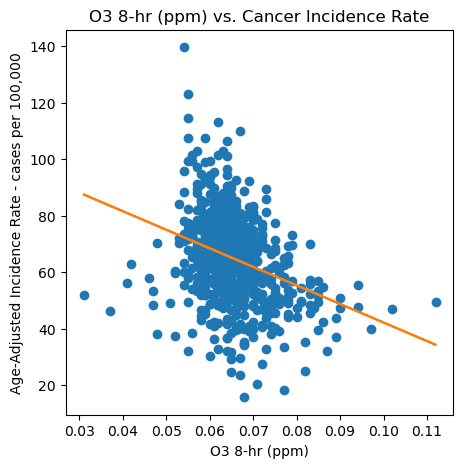

In [15]:
plot_cancer('O3 8-hr (ppm)')

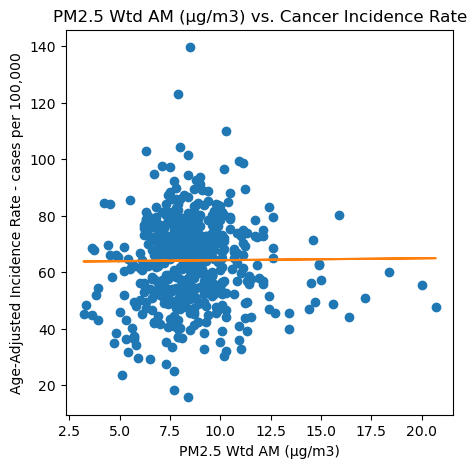

In [16]:
plot_cancer('PM2.5 Wtd AM (µg/m3)')

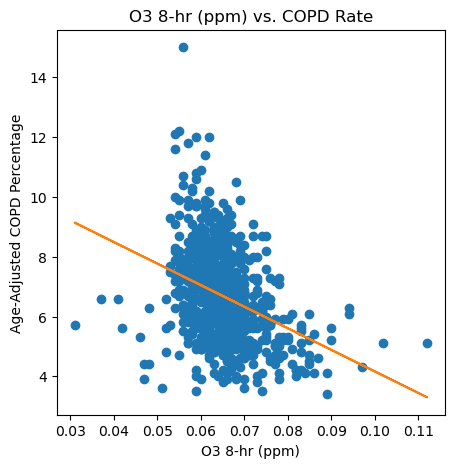

In [17]:
plot_COPD('O3 8-hr (ppm)')

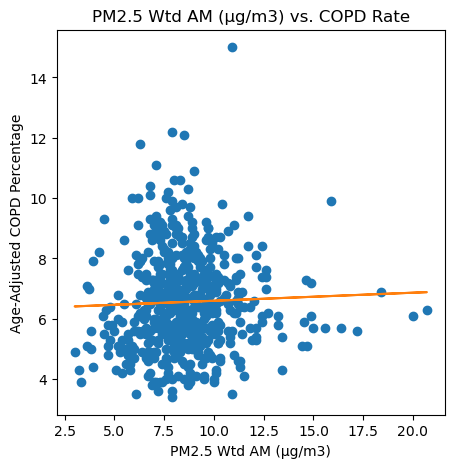

In [18]:
plot_COPD('PM2.5 Wtd AM (µg/m3)')

Based on the graphs from the data gathered, **there does not appear to be a positive relationship between county air pollutant amount and county diseases such as cancer or COPD**, which goes against what we may have expected (and what I expected up to this point...).

The most likely reason for this is that there are many factors involved in the development of cancer and COPD. A relatively straightforward analysis like this may not account for all of those factors. It may also be better to look at individuals rather than county-wide statistics to better account for the various factors at play. For example, cancer as a whole is extremely broad and has [risk factors](https://www.cancer.gov/about-cancer/causes-prevention/risk) ranging from alcohol and diet to tobacco and sunlight exposure.

In spite of these findings (or lack of findings), we will move forward under the assumption that **air pollutants are harmful to the health of individuals**. This can justified by sources previously linked and well-established research such as [this](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4740125/).

Instead, we will attempt to find whether electric power plants are associated with higher concentrations of dangerous air pollutants. The motivation behind this is that, [according to the EPA](https://www.epa.gov/ghgemissions/sources-greenhouse-gas-emissions), 25% of total US greenhouse emissions in 2021 came from electric power generation. If power plants contribute so greatly to greenhouse gas emissions (which cause global warming), then it's intuitive to think that they might also pollute the air in a way that's directly harmful to human health. **Let's see if this is the case!**

Let's use pandas to create a dataframe out of the power plant data we had downloaded.

In [19]:
df2 = pd.read_csv('Power_Plants.csv')
df2

,X,Y,OBJECTID,PLANT_CODE,NAME,ADDRESS,CITY,STATE,ZIP,TELEPHONE,...,COAL_USED,NGAS_USED,OIL_USED,NET_GEN,CAP_FACTOR,SUB_1,SUB_2,LINES,SOURCE_LAT,SOURC_LONG
0,-1.786647e+07,7.428080e+06,1,1,SAND POINT,100 POWER PLANT WAY,SAND POINT,AK,99661,NOT AVAILABLE,...,0,0,0,347.00,0.022007,NOT AVAILABLE,NOT AVAILABLE,0,55.339722,-160.497222
1,-9.724709e+06,3.956408e+06,2,2,BANKHEAD DAM,19001 LOCK 17 ROAD,NORTHPORT,AL,35476,(205) 333-1230,...,0,0,0,139170.00,0.299754,BANKHEAD DAM,NOT AVAILABLE,1,33.458665,-87.356823
2,-9.797359e+06,3.633590e+06,3,3,BARRY,NORTH HIGHWAY 43,BUCKS,AL,36512,(251) 829-9581,...,1292499,54793583,0,10499145.97,0.499451,BARRY,NOT AVAILABLE,1,31.006900,-88.010300
3,-9.604986e+06,3.840202e+06,4,4,WALTER BOULDIN DAM,750 BOULDIN DAM ROAD,WETUMPKA,AL,36092,(334) 567-6169,...,0,0,0,554613.00,0.282517,WALTER BOULDIN DAM,NOT AVAILABLE,1,32.583889,-86.283056
4,-9.570200e+06,4.030543e+06,5,7,GADSDEN,1000 GOODYEAR AVE,GADSDEN,AL,35903,(256) 546-6317,...,0,697629,0,50435.00,0.044288,GADSDEN,NOT AVAILABLE,1,34.012800,-85.970800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13228,-1.366625e+07,4.631700e+06,13229,NA03142,UNKNOWN,NOT AVAILABLE,SANTA ROSA,CA,95407,NOT AVAILABLE,...,-999999,-999999,-999999,-999999.00,-999999.000000,NOT AVAILABLE,NOT AVAILABLE,0,38.369103,-122.766056
13229,-1.283708e+07,4.321978e+06,13230,NA03143,FAITH LUTHERAN JR/SR HIGH SCHOOL,NOT AVAILABLE,LAS VEGAS,NV,89117,NOT AVAILABLE,...,-999999,-999999,-999999,-999999.00,-999999.000000,NOT AVAILABLE,NOT AVAILABLE,0,36.155078,-115.317474
13230,-1.173731e+07,4.434462e+06,13231,58240,KIT CARSON,195 VENTERO ROAD,AMALIA,NM,87512,(505) 123-1234,...,0,0,0,3018.00,0.265016,NOT AVAILABLE,NOT AVAILABLE,0,36.966667,-105.438056
13231,-1.280693e+07,4.329233e+06,13232,NA03145,NELLIS SOLAR PV II,NOT AVAILABLE,NELLIS AFB,NV,89191,NOT AVAILABLE,...,0,0,0,0.00,0.000000,NOT AVAILABLE,NOT AVAILABLE,0,36.207659,-115.046584


There are a lot of columns here, so we want to only keep the ones of potential interest. We'll do so by [slicing](https://pandas.pydata.org/docs/user_guide/indexing.html) again.

In [20]:
df2 = df2[['NAME', 'CITY', 'STATE', 'COUNTY', 'COAL_USED', 'NGAS_USED', 'OIL_USED']]

Let's now filter the dataset to only include power plants that have valid entries for coal, natural gas, and oil usage (i.e. nonnegative values)

In [21]:
# Remove entries that have negative values for fossil fuel used
df2 = df2[(df2['COAL_USED'] >= 0) & (df2['NGAS_USED'] >= 0) & (df2['OIL_USED'] >= 0)]

# Reset the indices to be 0, 1, 2, etc.
df2.reset_index(inplace=True, drop=True)

# Set the data types of the columns with strings to str
df2 = df2.astype({'NAME': str, 'CITY': str, 'STATE': str, 'COUNTY': str})

df2

,NAME,CITY,STATE,COUNTY,COAL_USED,NGAS_USED,OIL_USED
0,SAND POINT,SAND POINT,AK,ALEUTIANS EAST,0,0,0
1,BANKHEAD DAM,NORTHPORT,AL,TUSCALOOSA,0,0,0
2,BARRY,BUCKS,AL,MOBILE,1292499,54793583,0
3,WALTER BOULDIN DAM,WETUMPKA,AL,ELMORE,0,0,0
4,GADSDEN,GADSDEN,AL,ETOWAH,0,697629,0
...,...,...,...,...,...,...,...
12958,OSWELL B,UNINCORPORATED,CA,KERN,0,0,0
12959,SOUTH HIGH,BAKERSFIELD,CA,KERN,0,0,0
12960,YUBA,YUBA CITY,CA,SUTTER,0,0,0
12961,KIT CARSON,AMALIA,NM,TAOS,0,0,0


Now, to combine this data with the first dataset, we need to change each 'STATE' abbreviation to the state's full name. This can be done easily with a dictionary that I found [here](https://gist.github.com/rogerallen/1583593). We also need to add 'County' to the end of each county name.

In [22]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# Invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

# Change each state abbreviation to the full state name
df2['STATE'] = df2['STATE'].apply(lambda abbrev: abbrev_to_us_state[abbrev])

# Add 'County' to each county name (all of Puerto Rico was already dropped b/c of negative values)
df2['COUNTY'] = df2['COUNTY'].apply(lambda county_name: county_name + " COUNTY")

df2

,NAME,CITY,STATE,COUNTY,COAL_USED,NGAS_USED,OIL_USED
0,SAND POINT,SAND POINT,Alaska,ALEUTIANS EAST COUNTY,0,0,0
1,BANKHEAD DAM,NORTHPORT,Alabama,TUSCALOOSA COUNTY,0,0,0
2,BARRY,BUCKS,Alabama,MOBILE COUNTY,1292499,54793583,0
3,WALTER BOULDIN DAM,WETUMPKA,Alabama,ELMORE COUNTY,0,0,0
4,GADSDEN,GADSDEN,Alabama,ETOWAH COUNTY,0,697629,0
...,...,...,...,...,...,...,...
12958,OSWELL B,UNINCORPORATED,California,KERN COUNTY,0,0,0
12959,SOUTH HIGH,BAKERSFIELD,California,KERN COUNTY,0,0,0
12960,YUBA,YUBA CITY,California,SUTTER COUNTY,0,0,0
12961,KIT CARSON,AMALIA,New Mexico,TAOS COUNTY,0,0,0


Lastly, before joining, we should combine all power plants belonging to the same county and add their coal, natural gas, and oil usage amounts. This way, we know how much total fossil fuel is being used in each county. We'll do this using pandas' [group_by and aggregate](https://www.statology.org/pandas-combine-rows-with-same-column-value/) functions.

In [23]:
# Define how to aggregate various fields
agg_functions = {'STATE': 'first', 'COUNTY': 'first', 'COAL_USED': 'sum', 'NGAS_USED': 'sum', 'OIL_USED': 'sum'}

# Create new DataFrame by combining rows with same id values
df_new = df2[['STATE', 'COUNTY', 'COAL_USED', 'NGAS_USED', 'OIL_USED']]
df_new = df2.groupby(['STATE', 'COUNTY']).aggregate(agg_functions)
df_new.rename(columns={'STATE': 'State'}, inplace=True)

# Get rid of multiindex (byproduct of grouping by multiple variables and aggregating)
df_new = df_new.droplevel(1).reset_index()
df_new.drop('STATE', axis=1, inplace=True)

df_new

,State,COUNTY,COAL_USED,NGAS_USED,OIL_USED
0,Alabama,AUTAUGA COUNTY,0,84486516,15086
1,Alabama,BARBOUR COUNTY,0,0,0
2,Alabama,CALHOUN COUNTY,0,410261,4010
3,Alabama,CHAMBERS COUNTY,0,0,0
4,Alabama,CHEROKEE COUNTY,0,0,0
...,...,...,...,...,...
2225,Wyoming,PLATTE COUNTY,5458208,0,36482
2226,Wyoming,SWEETWATER COUNTY,7285732,7171852,16679
2227,Wyoming,TETON COUNTY,0,0,596
2228,Wyoming,UINTA COUNTY,0,0,0


Now let's merge the two dataframes. We can't use a left join here because we had to eliminate some entries from the power plants dataframe for having invalid values. Just because a county isn't in the dataframe doesn't mean it has zero fossil fuel usage (which a left join would end up suggesting), so we should use an inner join.

In [24]:
# Prepare df for merging by making a new 'COUNTY' column with the same name
df['COUNTY'] = df['County'].str.upper()

# Merge the two dataframes
df_merged = df.merge(df_new, on=['State', 'COUNTY'], how='inner')

# Drop the temporary 'COUNTY' column which was used just for merging
df.drop('COUNTY', axis=1, inplace=True)
df_merged.drop('COUNTY', axis=1, inplace=True)

df_merged

,State,County,County FIPS Code,NO2 AM (ppb),O3 8-hr (ppm),PM2.5 Wtd AM (µg/m3),COAL_USED,NGAS_USED,OIL_USED
0,Alabama,Colbert County,1033,NaN,NaN,NaN,0,52807,435
1,Alabama,DeKalb County,1049,NaN,0.058,7.7,0,0,0
2,Alabama,Elmore County,1051,NaN,0.054,NaN,0,0,0
3,Alabama,Escambia County,1053,NaN,NaN,NaN,0,6625694,0
4,Alabama,Etowah County,1055,NaN,0.058,NaN,0,697629,0
...,...,...,...,...,...,...,...,...,...
928,Wyoming,Platte County,56031,NaN,NaN,NaN,5458208,0,36482
929,Wyoming,Sweetwater County,56037,3.0,0.070,NaN,7285732,7171852,16679
930,Wyoming,Teton County,56039,NaN,0.067,5.1,0,0,596
931,Wyoming,Uinta County,56041,NaN,NaN,NaN,0,0,0


Great! We now have a dataframe which contains data on 933 counties, their air quality, and their fossil fuel usage. Now it's time to explore this data.

## Step 2: Exploratory Data Analysis

Our main goal here is to see if there's a trend between the amount of fossil fuels being used in a county and that county's air quality. There are many ways this can be done, though. First, let's see how many of our 933 counties do not use any fossil fuels in their power plants at all.

In [25]:
# Create a dataframe with only entries that have no coal, natural gas, or oil used
no_ff = df_merged[df_merged['COAL_USED'] + df_merged['NGAS_USED'] + df_merged['OIL_USED'] == 0]

len(no_ff)

288

288 of these counties don't use any fossil fuels in their power plants--that's around 30% of the 933 total counties.

Let's see which states these counties primarily reside in. To do this, we'll need to get the count of each value in the 'State' column. We'll also be using [seaborn](https://seaborn.pydata.org/) to make the plotting easy.

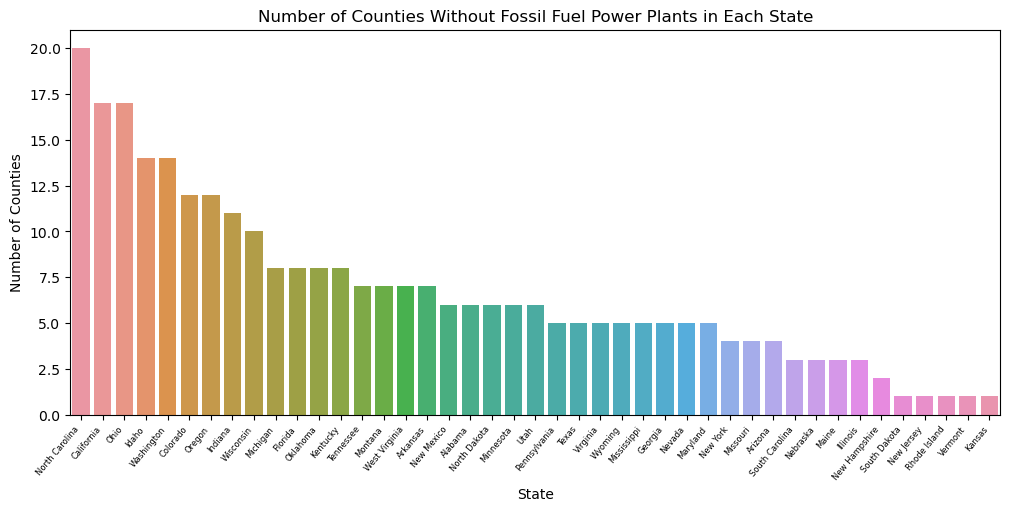

In [26]:
# This returns a Series of each state's frequency 
state_counts = no_ff['State'].value_counts()

# Set the figure size
fig = plt.figure(figsize=(12,5))

# Use seaborn to create a barplot
ax = sns.barplot(x=state_counts.index, y=state_counts.values)
ax.set(xlabel='State', ylabel='Number of Counties', title='Number of Counties Without Fossil Fuel Power Plants in Each State')
ax.set_xticklabels(state_counts.index, rotation=50, ha='right', fontsize=6);

Interesting--the five states with the most counties without fossil fuel power plants are North Carolina, California, Ohio, Idaho, and Washington. This doesn't paint a complete picture as there are factors we've left out such as population density, county sizes, and number of counties, but this still tells us something about individual states' reliance (or lack of reliance) on fossil fuels for energy production. The colors are also nice :)

Let's now see if there's a difference in air quality between counties that do use fossil fuel for electricity and those that do not. We can start off by looking at ozone and create two bars that graph average ozone concentrations.

Sample sizes, respectively: 168, 473


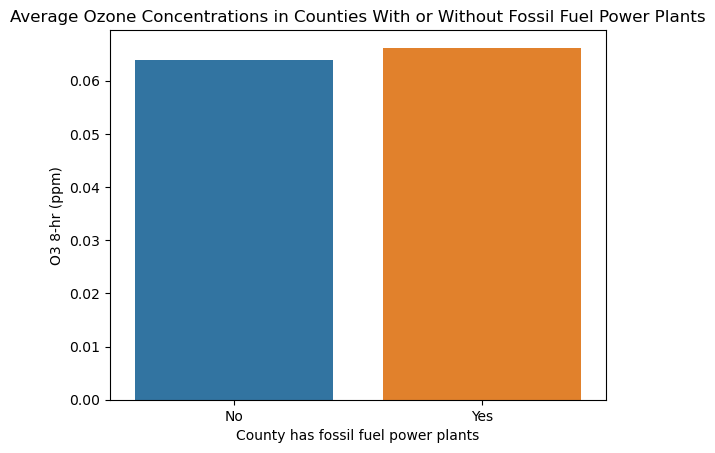

In [27]:
# Create a dataframe with only entries that have some coal, natural gas, or oil used
yes_ff = df_merged[df_merged['COAL_USED'] + df_merged['NGAS_USED'] + df_merged['OIL_USED'] > 0]

# Drop NaN values for ozone concentrations and get the individual columns
no_ff_O3 = no_ff[no_ff['O3 8-hr (ppm)'].notna()]['O3 8-hr (ppm)']
yes_ff_O3 = yes_ff[yes_ff['O3 8-hr (ppm)'].notna()]['O3 8-hr (ppm)']

# Use seaborn to create a barplot of the means
ax = sns.barplot(x=['No', 'Yes'], y=[no_ff_O3.mean(), yes_ff_O3.mean()])
ax.set(xlabel='County has fossil fuel power plants', ylabel='O3 8-hr (ppm)', title='Average Ozone Concentrations in Counties With or Without Fossil Fuel Power Plants');

print("Sample sizes, respectively: " + str(len(no_ff_O3)) + ", " + str(len(yes_ff_O3)))

There does appear to be _some_ difference in ozone concentrations, but it's really not that large. Let's do this same thing but with PM2.5 particles.

Sample sizes, respectively: 111, 369


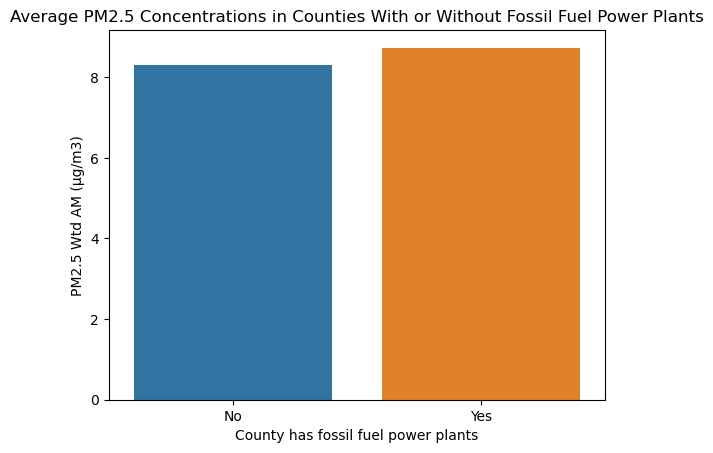

In [28]:
# Drop NaN values for PM2.5 concentrations and get the individual columns
no_ff_PM = no_ff[no_ff['PM2.5 Wtd AM (µg/m3)'].notna()]['PM2.5 Wtd AM (µg/m3)']
yes_ff_PM = yes_ff[yes_ff['PM2.5 Wtd AM (µg/m3)'].notna()]['PM2.5 Wtd AM (µg/m3)']

# Use seaborn to create a barplot of the means
ax = sns.barplot(x=['No', 'Yes'], y=[no_ff_PM.mean(), yes_ff_PM.mean()])
ax.set(xlabel='County has fossil fuel power plants', ylabel='PM2.5 Wtd AM (µg/m3)', title='Average PM2.5 Concentrations in Counties With or Without Fossil Fuel Power Plants');

print("Sample sizes, respectively: " + str(len(no_ff_PM)) + ", " + str(len(yes_ff_PM)))

Again, there is a difference, but it's not that large. Maybe looking at NO2 concentrations will give us a different result:

Sample sizes, respectively: 35, 174


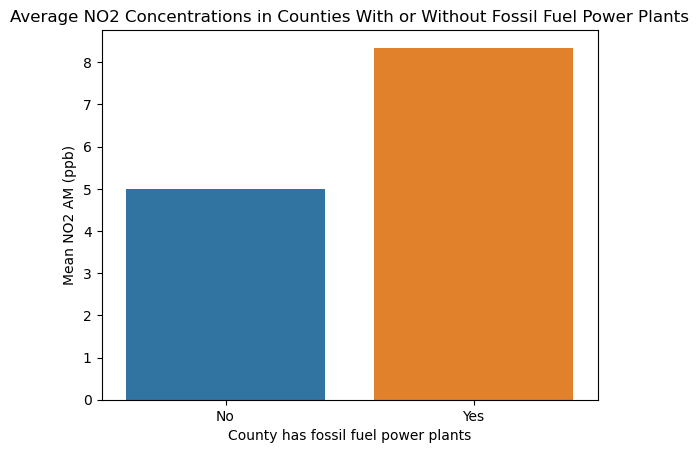

In [29]:
# Drop NaN values for NO2 concentrations and get the individual columns
no_ff_NO2 = no_ff[no_ff['NO2 AM (ppb)'].notna()]['NO2 AM (ppb)']
yes_ff_NO2 = yes_ff[yes_ff['NO2 AM (ppb)'].notna()]['NO2 AM (ppb)']

# Use seaborn to create a barplot
ax = sns.barplot(x=['No', 'Yes'], y=[no_ff_NO2.mean(), yes_ff_NO2.mean()])
ax.set(xlabel='County has fossil fuel power plants', ylabel='Mean NO2 AM (ppb)', title='Average NO2 Concentrations in Counties With or Without Fossil Fuel Power Plants');

print("Sample sizes, respectively: " + str(len(no_ff_NO2)) + ", " + str(len(yes_ff_NO2)))

Ahh, this is more like it! The sample sizes are smaller than with the other air pollutants, but there is a substantial difference in mean NO2 concentrations between counties that have fossil fuel power plants and those that do not. **We should further analyze this later**.

Now that we see a difference in NO2 concentrations, let's see if we can find a trend between the amounts of fossil fuels being used and air NO2 concentration. To do this, we'll look at the counties with fossil fuel power plants in them and then graph coal, natural gas, and oil usage amounts versus NO2 concentrations in a scatter plot. We'll also use numpy's [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) function to find a least-squares line.

Let's start with coal, then repeat the same process for natural gas and oil:

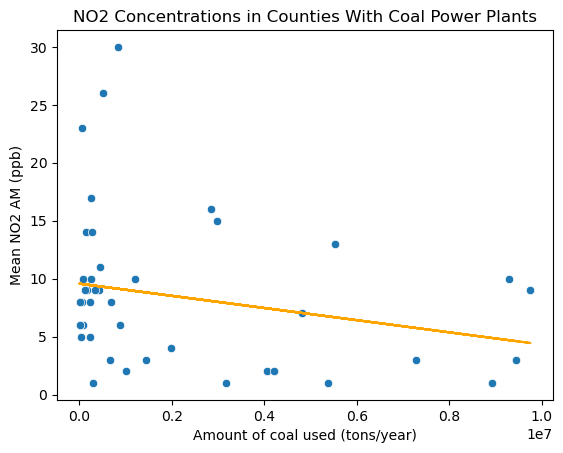

In [30]:
# Drop NaN values for NO2 concentrations but keep it as a df
yes_ff_NO2_df = yes_ff[yes_ff['NO2 AM (ppb)'].notna()]

# Also drop values where coal usage is zero
yes_ff_NO2_coal = yes_ff_NO2_df[yes_ff_NO2_df['COAL_USED'] > 0]

# Use seaborn to create a scatterplot
ax = sns.scatterplot(x=yes_ff_NO2_coal['COAL_USED'], y=yes_ff_NO2_coal['NO2 AM (ppb)'])
ax.set(xlabel='Amount of coal used (tons/year)', ylabel='Mean NO2 AM (ppb)', title='NO2 Concentrations in Counties With Coal Power Plants');

# Use polyfit to get a least-squares line, then plot it with seaborn
slope, intercept = np.polyfit(yes_ff_NO2_coal['COAL_USED'], yes_ff_NO2_coal['NO2 AM (ppb)'], 1)
ax.plot(yes_ff_NO2_coal['COAL_USED'], slope * yes_ff_NO2_coal['COAL_USED'] + intercept, color="orange");

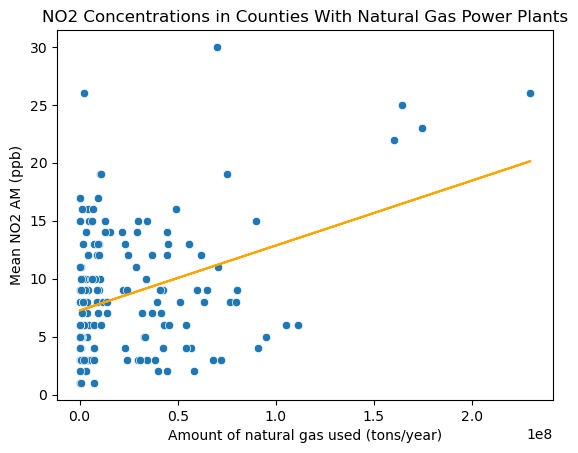

In [31]:
# Drop values where natural gas usage is zero
yes_ff_NO2_ngas = yes_ff_NO2_df[yes_ff_NO2_df['NGAS_USED'] > 0]

# There's an extreme outlier, so remove that from the dataset being plotted. Removing this line of code will show the outlier
yes_ff_NO2_ngas = yes_ff_NO2_ngas[yes_ff_NO2_ngas['NGAS_USED'] < 250000000]

# Use seaborn to create a scatterplot
ax = sns.scatterplot(x=yes_ff_NO2_ngas['NGAS_USED'], y=yes_ff_NO2_ngas['NO2 AM (ppb)'])
ax.set(xlabel='Amount of natural gas used (tons/year)', ylabel='Mean NO2 AM (ppb)', title='NO2 Concentrations in Counties With Natural Gas Power Plants');

# Use polyfit to get a least-squares line, then plot it with seaborn
slope, intercept = np.polyfit(yes_ff_NO2_ngas['NGAS_USED'], yes_ff_NO2_ngas['NO2 AM (ppb)'], 1)
ax.plot(yes_ff_NO2_ngas['NGAS_USED'], slope * yes_ff_NO2_ngas['NGAS_USED'] + intercept, color="orange");

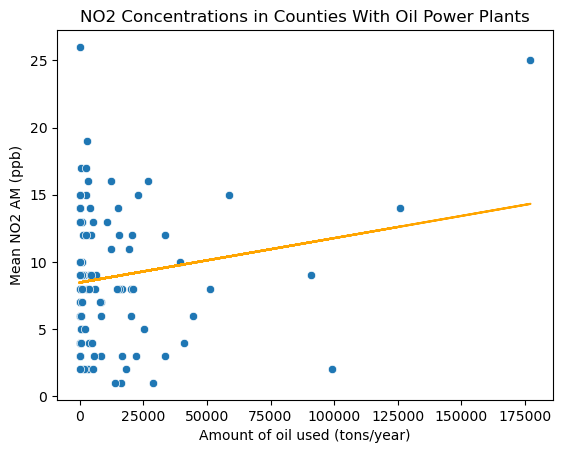

In [32]:
# Drop values where oil usage is zero
yes_ff_NO2_oil = yes_ff_NO2_df[yes_ff_NO2_df['OIL_USED'] > 0]

# There's an extreme outlier, so remove that from the dataset being plotted. Removing this line of code will show the outlier
yes_ff_NO2_oil = yes_ff_NO2_oil[yes_ff_NO2_oil['OIL_USED'] < 1000000]

# Use seaborn to create a scatterplot
ax = sns.scatterplot(x=yes_ff_NO2_oil['OIL_USED'], y=yes_ff_NO2_oil['NO2 AM (ppb)'])
ax.set(xlabel='Amount of oil used (tons/year)', ylabel='Mean NO2 AM (ppb)', title='NO2 Concentrations in Counties With Oil Power Plants');

# Use polyfit to get a least-squares line, then plot it with seaborn
slope, intercept = np.polyfit(yes_ff_NO2_oil['OIL_USED'], yes_ff_NO2_oil['NO2 AM (ppb)'], 1)
ax.plot(yes_ff_NO2_oil['OIL_USED'], slope * yes_ff_NO2_oil['OIL_USED'] + intercept, color="orange");

This was okay, although the trends seem a little unreliable--for coal, the trend is even negative. What if we can combine coal, oil, and natural gas usage into one statistic? The method we'll use for this may be an oversimplification, but it is better than just adding up a county's usage of coal, oil, and natural gas since these fossil fuels may produce different amounts of energy or pollute different amounts of NO2 per unit weight. A simple sum would not reflect these distinctions at all.

To find the standardized value for each county's coal use, we'll take the amount of coal used and subtract the mean amount of coal used. Then we'll divide by the standard deviation of coal used. We'll repeat this for natural gas and oil, and then add these three up to get a combined value representing the county's total fossil fuel usage. The formula looks like this:

$u=\frac{x_{coal}-\bar{x}_{coal}}{s_{coal}}+\frac{x_{ngas}-\bar{x}_{ngas}}{s_{ngas}}+\frac{x_{oil}-\bar{x}_{oil}}{s_{oil}}$

In [33]:
# Means
coal_mean = yes_ff['COAL_USED'].mean()
ngas_mean = yes_ff['NGAS_USED'].mean()
oil_mean = yes_ff['OIL_USED'].mean()

# Standard deviations
coal_sd = yes_ff['COAL_USED'].std()
ngas_sd = yes_ff['NGAS_USED'].std()
oil_sd = yes_ff['OIL_USED'].std()

# Add a "standarized fossil fuel usage" column
yes_ff2 = yes_ff_NO2_df.copy()
yes_ff2['STD_FF_USAGE'] = ((yes_ff['COAL_USED'] - coal_mean) / coal_sd) + ((yes_ff['NGAS_USED'] - ngas_mean) / ngas_sd) + ((yes_ff['OIL_USED'] - oil_mean) / oil_sd)

yes_ff2

,State,County,County FIPS Code,NO2 AM (ppb),O3 8-hr (ppm),PM2.5 Wtd AM (µg/m3),COAL_USED,NGAS_USED,OIL_USED,STD_FF_USAGE
6,Alabama,Jefferson County,1073,10.0,0.064,12.6,9291433,3343161,0,5.328717
21,Arizona,Maricopa County,4013,26.0,0.083,10.7,0,229757163,40,6.869426
24,Arizona,Pima County,4019,8.0,0.068,6.6,0,9090629,0,-0.584808
39,Arkansas,Pulaski County,5119,7.0,0.067,9.7,0,3892714,0,-0.760393
44,California,Alameda County,6001,12.0,0.073,8.7,0,8949545,15489,-0.540992
...,...,...,...,...,...,...,...,...,...,...
920,Wyoming,Carbon County,56007,4.0,NaN,NaN,0,178320,691,-0.883698
921,Wyoming,Converse County,56009,1.0,0.070,NaN,3181134,0,13962,1.243005
922,Wyoming,Fremont County,56013,3.0,0.073,8.5,0,738958,0,-0.866927
924,Wyoming,Laramie County,56021,3.0,0.075,5.2,0,2324106,0,-0.813380


Now let's make one more scatterplot, this time showing standardized fossil fuel usage versus NO2 concentration.

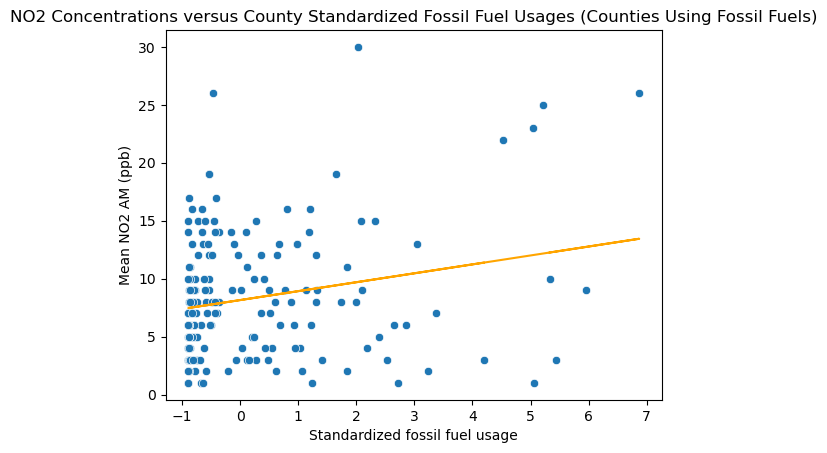

In [34]:
# There's are some outliers, so remove them from the dataset being plotted. Removing this line of code will show the outliers
yes_ff2 = yes_ff2[yes_ff2['STD_FF_USAGE'] < 10]

# Use seaborn to create a scatterplot
ax = sns.scatterplot(x=yes_ff2['STD_FF_USAGE'], y=yes_ff2['NO2 AM (ppb)'])
ax.set(xlabel='Standardized fossil fuel usage', ylabel='Mean NO2 AM (ppb)', title='NO2 Concentrations versus County Standardized Fossil Fuel Usages (Counties Using Fossil Fuels)');

# Use polyfit to get a least-squares line, then plot it with seaborn
slope, intercept = np.polyfit(yes_ff2['STD_FF_USAGE'], yes_ff2['NO2 AM (ppb)'], 1)
ax.plot(yes_ff2['STD_FF_USAGE'], slope * yes_ff2['STD_FF_USAGE'] + intercept, color="orange");

When we remove the most extreme outliers, it appears that there may be some positive trend between overall fossil fuel usage in power plants and NO2 emissions. However, the trend seems fairly weak and more analysis will be needed.

Let's repeat the last step but include all power plants, not just ones that use fossil fuels.

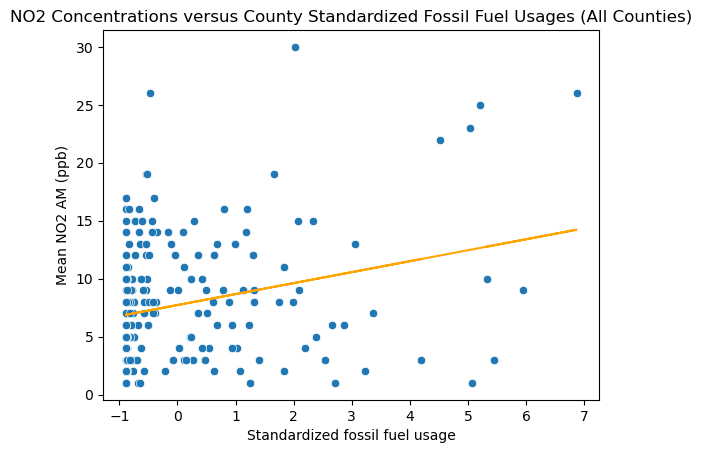

In [35]:
# Get the original merged dataframe (containing counties' individual fossil fuel usages) and include only entries with data on NO2
df_merged_NO2 = df_merged[df_merged['NO2 AM (ppb)'].notna()]

# Apply the discussed formula
merged2 = df_merged_NO2.copy()
merged2['STD_FF_USAGE'] = ((df_merged_NO2['COAL_USED'] - coal_mean) / coal_sd) + ((df_merged_NO2['NGAS_USED'] - ngas_mean) / ngas_sd) + ((df_merged_NO2['OIL_USED'] - oil_mean) / oil_sd)

# There are some outliers, so remove them from the dataset being plotted. Removing this line of code will show the outliers
merged2 = merged2[merged2['STD_FF_USAGE'] < 10]

# Use seaborn to create a scatterplot
ax = sns.scatterplot(x=merged2['STD_FF_USAGE'], y=merged2['NO2 AM (ppb)'])
ax.set(xlabel='Standardized fossil fuel usage', ylabel='Mean NO2 AM (ppb)', title='NO2 Concentrations versus County Standardized Fossil Fuel Usages (All Counties)');

# Use polyfit to get a least-squares line, then plot it with seaborn
slope, intercept = np.polyfit(merged2['STD_FF_USAGE'], merged2['NO2 AM (ppb)'], 1)
ax.plot(merged2['STD_FF_USAGE'], slope * merged2['STD_FF_USAGE'] + intercept, color="orange");

After removing some outliers, this graph looks similar to the last one. It's time for analysis!

## Hypothesis Testing and Machine Learning to Provide Analysis

Let's start off by testing the claim that counties containing fossil fuel power plants have higher concentrations of NO2 in their air than counties that do not contain fossil fuel power plants. Here's the graph as a refresher:

Sample sizes, respectively: 35, 174


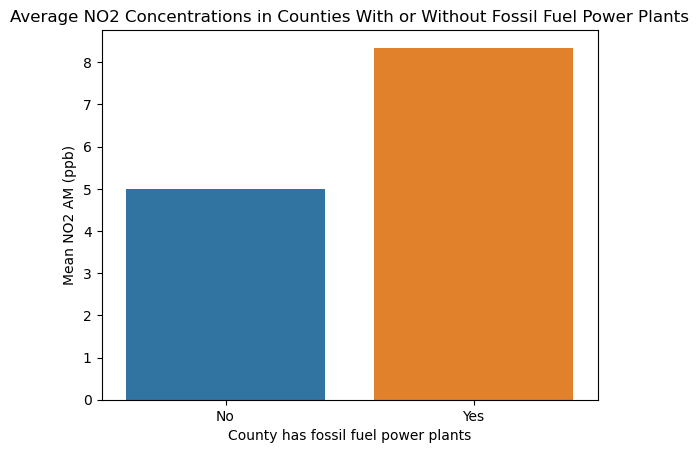

In [36]:
ax = sns.barplot(x=['No', 'Yes'], y=[no_ff_NO2.mean(), yes_ff_NO2.mean()])
ax.set(xlabel='County has fossil fuel power plants', ylabel='Mean NO2 AM (ppb)', title='Average NO2 Concentrations in Counties With or Without Fossil Fuel Power Plants');

print("Sample sizes, respectively: " + str(len(no_ff_NO2)) + ", " + str(len(yes_ff_NO2)))

To see whether our data supports this claim, we need to conduct a hypothesis test for a difference in two population means. We will assume that the data was sampled randomly and that the data is independent. Here, our null hypothesis is that the mean NO2 concentrations are equal:

$H_{0}: µ_{no}=µ_{yes}$, or in other words, $H_{0}: µ_{no} - µ_{yes} = 0$

and our alternative hypothesis is that the mean NO2 concentration of counties with fossil fuel plants is greater than the mean NO2 concentration of counties without them:

$H_{a}: µ_{no}<µ_{yes}$, or in other words, $H_{a}: µ_{no} - µ_{yes} < 0$.

Because we are [dealing with means, n>=30, and we do not know the population standard deviation](https://bloomingtontutors.com/blog/when-to-use-the-z-test-versus-t-test), we will be conducting a two-sample t-test. I found [this](https://www.youtube.com/watch?v=OuPVg5tfrE0) video to be extremely helpful in this situation. First, let's calculate sample sizes, sample means, and standard deviations.

In [37]:
# Sample sizes
n_no = len(no_ff_NO2)
n_yes = len(yes_ff_NO2)

# Sample means
xbar_no = no_ff_NO2.mean()
xbar_yes = yes_ff_NO2.mean()

# Sample standard deviations
s_no = no_ff_NO2.std()
s_yes = yes_ff_NO2.std()

print("n_no:", n_no, "\nn_yes:", n_yes, "\nxbar_no:", xbar_no, "\nxbar_yes:", xbar_yes, "\ns_no:", s_no, "\ns_yes:", s_yes)

n_no: 35 
n_yes: 174 
xbar_no: 5.0 
xbar_yes: 8.344827586206897 
s_no: 3.2539568672798427 
s_yes: 5.472638374618789


Let's now calculate the t-score using this formula (FYI, I'm using this [cheat sheet](https://wch.github.io/latexsheet/) to help me write in LaTeX):

$t=\frac{(\bar{x}_{no}-\bar{x}_{yes})-(µ_{no}-µ_{yes})}{\sqrt{\frac{s_{no}^2}{n_{no}}+\frac{s_{yes}^2}{n_{yes}}}}$

In [38]:
# µ_no - µ_yes is zero since we assume the means to be equal
t = ((xbar_no - xbar_yes) - 0) / np.sqrt(((s_no**2)/n_no) + ((s_yes**2)/n_yes))
t

-4.85499475707261

Our [degrees of freedom](https://www.statology.org/calculate-degrees-of-freedom-for-t-test/) is given by:

$df=n_{no}+n_{yes}-2$

In [39]:
df = n_no + n_yes - 2
df

207

Using our t-score and degrees of freedom, we can plug these numbers into any online [t-score to p-value calculator](https://www.statology.org/t-score-p-value-calculator/) for a one-tailed hypothesis at a significance level of 0.01. We can also estimate the p-value with a [t-table](https://www.ttable.org/). Doing either of these gives us a p-value of close to zero--they give us, at the very least, that:

$p<0.0005$.

With a significance level $α=0.01$, we then **reject our null hypothesis** and **accept our alternative hypothesis** since $p<α$.

### We have significant evidence to suggest that, in the US, counties with fossil fuel power plants tend to have higher concentrations of atmospheric NO$_{2}$ than counties without fossil fuel power plants.

We will get in to the implications of this later, but for now, we should also try to see if there's a relationship between air quality and the amount of fossil fuels used in power plants. Here's the graph we already made that we'll be analyzing:

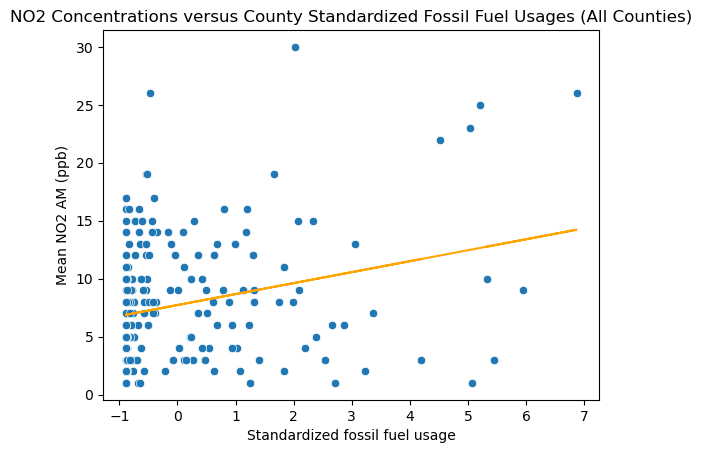

In [40]:
# Use seaborn to create a scatterplot
ax = sns.scatterplot(x=merged2['STD_FF_USAGE'], y=merged2['NO2 AM (ppb)'])
ax.set(xlabel='Standardized fossil fuel usage', ylabel='Mean NO2 AM (ppb)', title='NO2 Concentrations versus County Standardized Fossil Fuel Usages (All Counties)');

# Use polyfit to get a least-squares line, then plot it with seaborn
slope, intercept = np.polyfit(merged2['STD_FF_USAGE'], merged2['NO2 AM (ppb)'], 1)
ax.plot(merged2['STD_FF_USAGE'], slope * merged2['STD_FF_USAGE'] + intercept, color="orange");

Previously, I decided to eliminate outliers just by looking at the graph and finding points that stuck way out. However, we can do this in a more "scientific" way. A more formal way of determining outliers is the [1.5 IQR rule](https://articles.outlier.org/calculate-outlier-formula). Anything that's 1.5\*IQR below the first quartile or above the third quartile is deemed an outlier. Let's calculate the cutoffs using this new definition of an outlier:

In [41]:
# Apply the same standardization formula as done before
merged2 = df_merged_NO2.copy()
merged2['STD_FF_USAGE'] = ((df_merged_NO2['COAL_USED'] - coal_mean) / coal_sd) + ((df_merged_NO2['NGAS_USED'] - ngas_mean) / ngas_sd) + ((df_merged_NO2['OIL_USED'] - oil_mean) / oil_sd)

# Find quartiles of standardized fossil fuel usage using pandas' quantile function
quartiles = merged2['STD_FF_USAGE'].quantile([0.25, 0.5, 0.75])
q1 = quartiles[0.25]
q3 = quartiles[0.75]

# Find the IQR and lower and upper cutoffs
IQR = q3 - q1
lower_cutoff_x = q1 - 1.5 * IQR
upper_cutoff_x = q3 + 1.5 * IQR

We should also apply this rule to the y-axis (NO2 concentrations):

In [42]:
# Find quartiles of NO2 concentrations using pandas' quantile function
quartiles = merged2['NO2 AM (ppb)'].quantile([0.25, 0.5, 0.75])
q1 = quartiles[0.25]
q3 = quartiles[0.75]

# Find the IQR and lower and upper cutoffs
IQR = q3 - q1
lower_cutoff_y = q1 - 1.5 * IQR
upper_cutoff_y = q3 + 1.5 * IQR

Let's first graph the data, along with a least-squares line, before we apply this and remove *any* outliers.

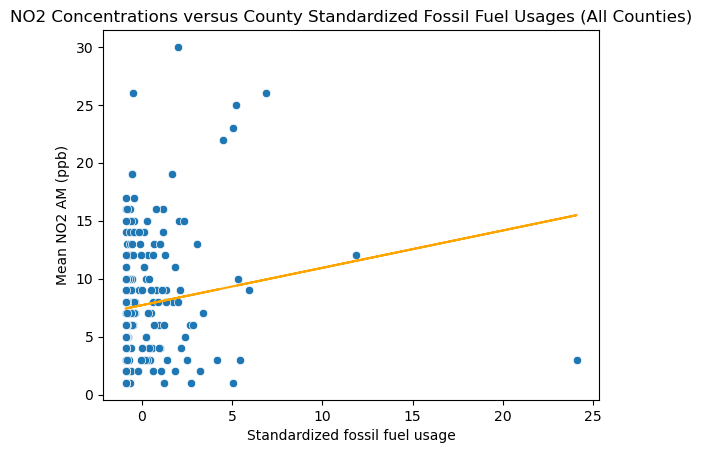

In [43]:
# Use seaborn to create a scatterplot
ax = sns.scatterplot(x=merged2['STD_FF_USAGE'], y=merged2['NO2 AM (ppb)'])
ax.set(xlabel='Standardized fossil fuel usage', ylabel='Mean NO2 AM (ppb)', title='NO2 Concentrations versus County Standardized Fossil Fuel Usages (All Counties)');

# Use polyfit to get a least-squares line, then plot it with seaborn
slope, intercept = np.polyfit(merged2['STD_FF_USAGE'], merged2['NO2 AM (ppb)'], 1)
ax.plot(merged2['STD_FF_USAGE'], slope * merged2['STD_FF_USAGE'] + intercept, color="orange");

Let's now remove the outliers from the dataset and plot the new set:

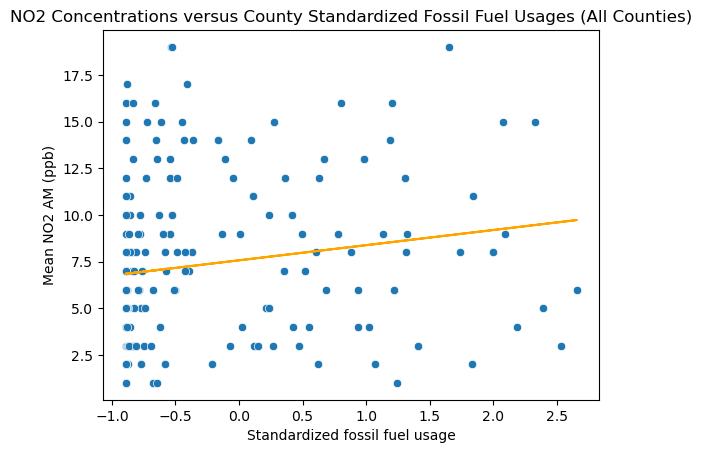

In [44]:
# Only include points with values within the desired ranges
merged3 = merged2[(merged2['STD_FF_USAGE'] >= lower_cutoff_x) & (merged2['STD_FF_USAGE'] <= upper_cutoff_x) &
                  (merged2['NO2 AM (ppb)'] >= lower_cutoff_y) & (merged2['NO2 AM (ppb)'] <= upper_cutoff_y)]

# Use seaborn to create a scatterplot
ax = sns.scatterplot(x=merged3['STD_FF_USAGE'], y=merged3['NO2 AM (ppb)'])
ax.set(xlabel='Standardized fossil fuel usage', ylabel='Mean NO2 AM (ppb)', title='NO2 Concentrations versus County Standardized Fossil Fuel Usages (All Counties)');

# Use polyfit to get a least-squares line, then plot it with seaborn
slope, intercept = np.polyfit(merged3['STD_FF_USAGE'], merged3['NO2 AM (ppb)'], 1)
ax.plot(merged3['STD_FF_USAGE'], slope * merged3['STD_FF_USAGE'] + intercept, color="orange");

We now have two models: one including all outliers and one without outliers. In both models, the least-squares regression lines have a positive slope which suggest (to an unknown degree right now) that there's a positive association between fossil fuel usage and NO2 concentrations. To see whether these associations are statistically significant, we should conduct two identical hypothesis tests--one for each model.

Let our null hypothesis $H_{0}$ be that there is no relationship between standardized power plant fossil fuel usage and NO2 concentration in the air. Our alternative hypothesis $H_{a}$ is that there is a positive relationship between standardized power plant fossil fuel usage and NO2 concentration in the air. We'll set the significance level at $α=0.05$.

Using statsmodels.formula.api's [ols function](https://www.statsmodels.org/devel/generated/statsmodels.formula.api.ols.html), we are able to easily compute the p-value for the linear regression models we previously found using polyfit and then plotted. We'll do so below and print the two p-values:

In [45]:
# Rename the NO2 column so that it has no spaces and can be used in the formula below
merged2_renamed = merged2.rename(columns={'NO2 AM (ppb)': 'NO2'})

# Apply the ols function relating fossil fuel usage to NO2 concentration
res = smf.ols(formula="STD_FF_USAGE ~ NO2", data=merged2_renamed).fit()
p1 = res.pvalues[1]

In [46]:
# Rename the NO2 column so that it has no spaces and can be used in the formula below
merged3_renamed = merged3.rename(columns={'NO2 AM (ppb)': 'NO2'})

# Apply the ols function relating fossil fuel usage to NO2 concentration
res = smf.ols(formula="STD_FF_USAGE ~ NO2", data=merged3_renamed).fit()
p2 = res.pvalues[1]

print("P-value for model with outliers (p1):", p1)
print("P-value for model without outliers (p2):", p2)

P-value for model with outliers (p1): 0.03647459365249521
P-value for model without outliers (p2): 0.023041735196688024


With a significance level $α=0.05$, we then **reject our null hypothesis** and **accept our alternative hypothesis** for both models since $p_{1}<α$ and $p_{2}<α$.

### We have significant evidence to suggest that, in US counties, higher fossil fuel usage in power plants is correlated with higher concentrations of atmospheric NO$_{2}$.

## Message and Insights

Based on our findings, we have evidence to support these two claims:

**-On average, counties in the US with fossil fuel power plants have higher concentrations of toxic nitrogen dioxide gas than counties without fossil fuel power plants.**

**-The more a county uses fossil fuels for energy production, in general, the higher its concentrations of atmospheric nitrogen dioxide.**

These findings are relevant not just to policymakers who decide the fate of fossil fuels, but also to people like you and me. We know that nitrogen dioxide (NO2) can be extremely harmful to our health--why would we want to live in a county where there's an elevated risk of developing health complications? If we consider our own wellbeing as a main factor in the fight against fossil fuels, there's even more incentive for us to support sustainable practices such as renewable energy and to urge policymakers to combat climate change and pollution.

I hope you learned a bit from this tutorial--both in data science and the need to protect our air quality. I highly recommend you read more into [environmental protection](https://www.epa.gov/) to see the steps that are being taken against the climate crisis for the health of people and life overall. I also urge you to continue your own research into this matter, following whatever interests you and taking action in your own way. Finally, I hope you want to learn more about data science and the data science pipeline; you can do so by clicking [here](https://www.geeksforgeeks.org/whats-data-science-pipeline/) or however else you'd like.

Thank you!